In [ ]:
import kagglehub
import os
import shutil

In [ ]:
#Run Twice
path_general = kagglehub.dataset_download("ismail703/insects")
path_roaches = kagglehub.dataset_download("sauraab/dataset-for-ant-bee-cockroach-spider-images")

Using Colab cache for faster access to the 'insects' dataset.
Using Colab cache for faster access to the 'dataset-for-ant-bee-cockroach-spider-images' dataset.


In [ ]:
source_dir_insects = "/kaggle/input/insects"
source_dir_roaches = "/kaggle/input/dataset-for-ant-bee-cockroach-spider-images/training_set"
dest_dir = "/content/my_bug_dataset"

if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

folders_to_move = ["Ant","Spider", "Beetle","Fly","Mosquito","Wasp","cockroach","Grasshopper"]

for folder in folders_to_move:
    if folder == "cockroach":
      src_path = os.path.join(source_dir_roaches, folder)
    else:
      src_path = os.path.join(source_dir_insects, folder)
    dst_path = os.path.join(dest_dir, folder)

    if os.path.exists(src_path):
        shutil.copytree(src_path, dst_path)
        print(f"Moved: {folder}")
    else:
        print(f"Folder not found: {folder}")

Moved: Ant
Moved: Spider
Moved: Beetle
Moved: Fly
Moved: Mosquito
Moved: Wasp
Moved: cockroach
Moved: Grasshopper


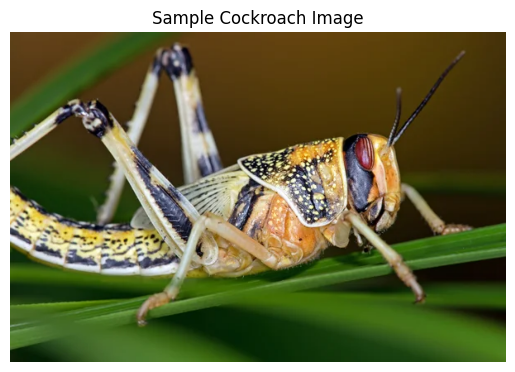

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Pick a random image to display
folder = "/content/my_bug_dataset/Grasshopper"
random_image = random.choice(os.listdir(folder))
img = mpimg.imread(os.path.join(folder, random_image))

plt.imshow(img)
plt.title("Sample Cockroach Image")
plt.axis('off')
plt.show()

In [ ]:
#Image cleaning to remove unreadable files
import os
import tensorflow as tf
import shutil

data_dir = "/content/my_bug_dataset"
print("Starting Deep Clean using TensorFlow...")

deleted_count = 0


for root, dirs, files in os.walk(data_dir):
    for filename in files:
        file_path = os.path.join(root, filename)

        try:
            if os.path.getsize(file_path) == 0:
                print(f"❌ Deleting empty file: {filename}")
                os.remove(file_path)
                deleted_count += 1
                continue


            with open(file_path, 'rb') as f:
                img_bytes = f.read()
                decoded_img = tf.io.decode_image(img_bytes)

        except Exception as e:

            print(f"❌ Deleting corrupted file ({e}): {filename}")
            os.remove(file_path)
            deleted_count += 1


    if '.ipynb_checkpoints' in dirs:
        shutil.rmtree(os.path.join(root, '.ipynb_checkpoints'))
        dirs.remove('.ipynb_checkpoints')

print(f"\nDeep Clean Complete! Deleted {deleted_count} bad files.")

Starting Deep Clean using TensorFlow...
❌ Deleting corrupted file ({{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]): Fly_418.jpg
❌ Deleting corrupted file ({{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]): Fly_321.jpg
❌ Deleting corrupted file ({{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]): Fly_320.jpg
❌ Deleting corrupted file ({{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]): Fly_323.jpg
❌ Deleting corrupted file ({{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/ta

In [ ]:
import tensorflow as tf
from keras import layers, models

batch_size = 32
img_height = 180
img_width = 180

data_dir = '/content/my_bug_dataset'

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split = 0.2, subset="training",seed=123,image_size =(img_height,img_width),batch_size = batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset='validation',seed=123,image_size=(img_height,img_width),batch_size=batch_size)
class_names = train_ds.class_names
print('Classes found:',class_names)

Found 5708 files belonging to 8 classes.
Using 4567 files for training.
Found 5708 files belonging to 8 classes.
Using 1141 files for validation.
Classes found: ['Ant', 'Beetle', 'Fly', 'Grasshopper', 'Mosquito', 'Spider', 'Wasp', 'cockroach']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),

    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    ])
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print("Model built successfully!")
model.summary()

Model built successfully!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,672 (15.22 MB)

 Trainable params: 3,989,672 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

## EPOCHS TESTS

---



In [ ]:
epochs = 5
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs)

Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.2920 - loss: 1.8952 - val_accuracy: 0.5399 - val_loss: 1.3414
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.6038 - loss: 1.1220 - val_accuracy: 0.6792 - val_loss: 0.9285
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.7695 - loss: 0.7034 - val_accuracy: 0.7344 - val_loss: 0.7787
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.8450 - loss: 0.4723 - val_accuracy: 0.7520 - val_loss: 0.7822
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.8952 - loss: 0.3130 - val_accuracy: 0.7634 - val_loss: 0.7613


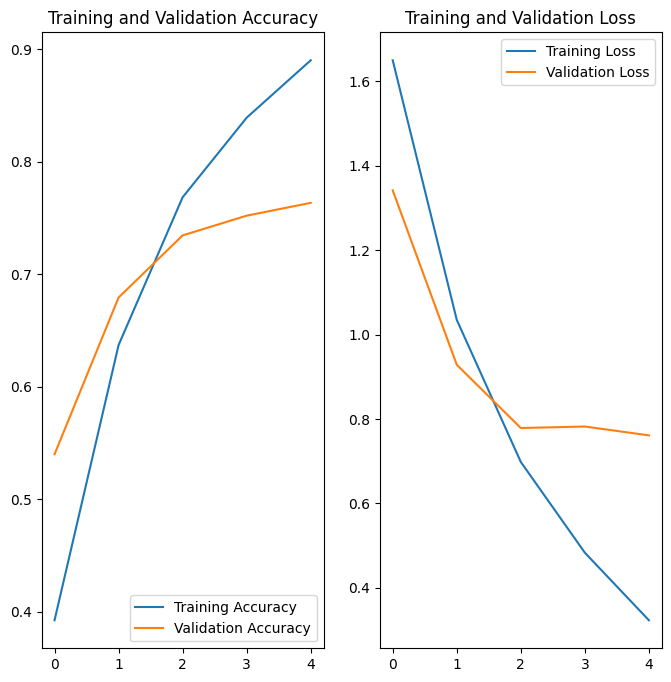

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Please upload a picture of a bug to test!


Saving Different_Roach.jpg to Different_Roach.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


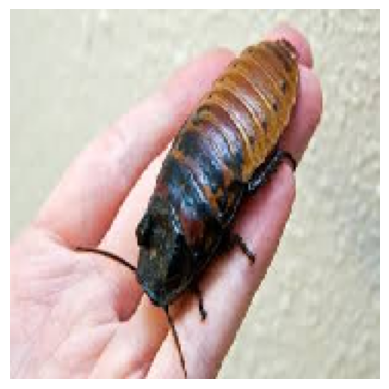

I am 83.73% confident this is a Beetle.


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array


print("Please upload a picture of a bug to test!")
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = load_img(path, target_size=(180, 180))


  img_array = img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)


  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])


  plt.imshow(img)
  plt.axis('off')
  plt.show()

  print(
      "I am {:.2f}% confident this is a {}."
      .format(100 * np.max(score), class_names[np.argmax(score)])
  )

In [ ]:
# 10 Epochs
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),

    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    ])
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print("Model built successfully!")
model.summary()

Model built successfully!


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,672 (15.22 MB)

 Trainable params: 3,989,672 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.2247 - loss: 2.1358 - val_accuracy: 0.5083 - val_loss: 1.3562
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5902 - loss: 1.1715 - val_accuracy: 0.6494 - val_loss: 1.0356
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7080 - loss: 0.8288 - val_accuracy: 0.6915 - val_loss: 0.9224
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8033 - loss: 0.5678 - val_accuracy: 0.7327 - val_loss: 0.8344
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8919 - loss: 0.3334 - val_accuracy: 0.7590 - val_loss: 0.8264
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9436 - loss: 0.1908 - val_accuracy: 0.7520 - val_loss: 0.9781
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9675 - loss: 0.1103 - val_accuracy: 0.7844 - val_loss: 0.9620
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9889 - loss: 0.0486 - val_accu

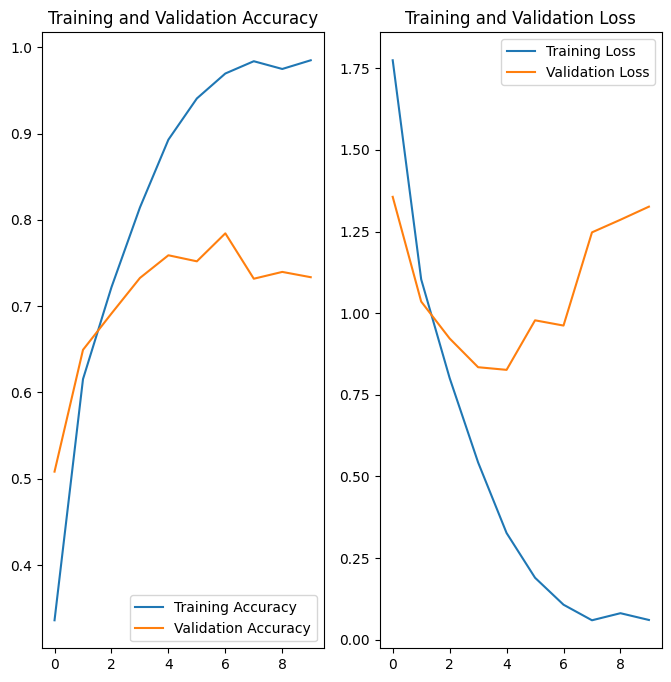

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Please upload a picture of a bug to test!


Saving Spider.jpg to Spider.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


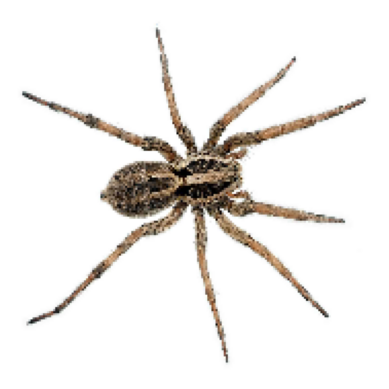

I am 99.97% confident this is a Spider.


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

# 1. Upload an image
print("Please upload a picture of a bug to test!")
uploaded = files.upload()

for fn in uploaded.keys():
  # 2. Load and resize the image to match your model (180x180)
  path = fn
  img = load_img(path, target_size=(180, 180))

  # 3. Convert to array and add a batch dimension
  img_array = img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  # 4. Make prediction
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  # 5. Show result
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  print(
      "I am {:.2f}% confident this is a {}."
      .format(100 * np.max(score), class_names[np.argmax(score)])
  )

In [ ]:
# Add dropout
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),

    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dropout(0.5),
    layers.Dense(num_classes)
    ])
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print("Model built successfully!")
model.summary()

Model built successfully!


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,672 (15.22 MB)

 Trainable params: 3,989,672 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 17
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs)

Epoch 1/17
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.1749 - loss: 2.1547 - val_accuracy: 0.3944 - val_loss: 1.8064
Epoch 2/17
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4169 - loss: 1.6426 - val_accuracy: 0.5723 - val_loss: 1.2798
Epoch 3/17
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5441 - loss: 1.2616 - val_accuracy: 0.6284 - val_loss: 1.0217
Epoch 4/17
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6379 - loss: 0.9988 - val_accuracy: 0.6705 - val_loss: 0.9446
Epoch 5/17
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7068 - loss: 0.8371 - val_accuracy: 0.7292 - val_loss: 0.8260
Epoch 6/17
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7665 - loss: 0.6846 - val_accuracy: 0.7537 - val_loss: 0.7546
Epoch 7/17
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8121 - loss: 0.5436 - val_accuracy: 0.7660 - val_loss: 0.7105
Epoch 8/17
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8288 - loss: 0.4908 - val_accu

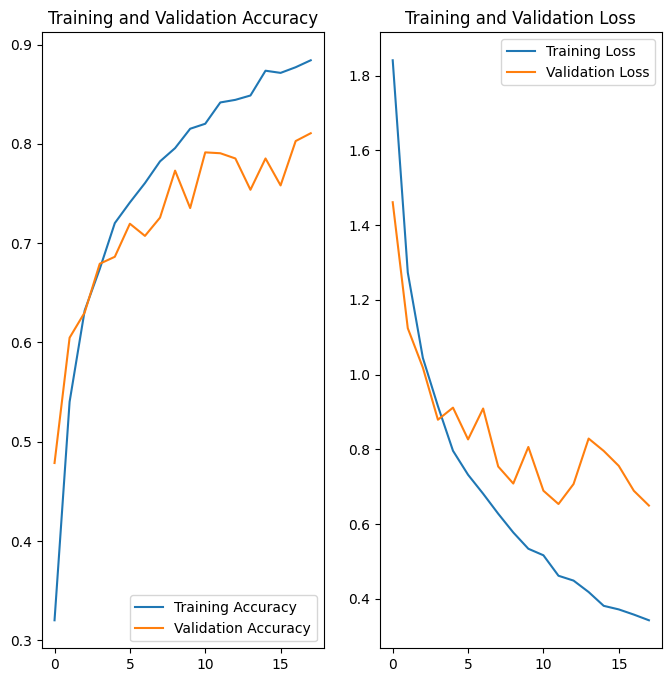

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Please upload a picture of a bug to test!


Saving Different_Roach.jpg to Different_Roach (6).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


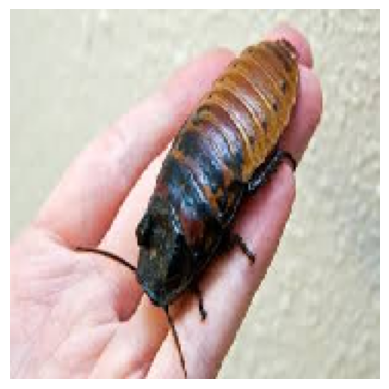

I am 62.30% confident this is a Beetle.


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

# 1. Upload an image
print("Please upload a picture of a bug to test!")
uploaded = files.upload()

for fn in uploaded.keys():
  # 2. Load and resize the image to match your model (180x180)
  path = fn
  img = load_img(path, target_size=(180, 180))

  # 3. Convert to array and add a batch dimension
  img_array = img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  # 4. Make prediction
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  # 5. Show result
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  print(
      "I am {:.2f}% confident this is a {}."
      .format(100 * np.max(score), class_names[np.argmax(score)])
  )

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height,img_width,3)),

    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    ])
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print("Model built successfully!")
model.summary()

Model built successfully!


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_8 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 18
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs)

Epoch 1/18
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2283 - loss: 2.1404 - val_accuracy: 0.4785 - val_loss: 1.4614
Epoch 2/18
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5011 - loss: 1.3687 - val_accuracy: 0.6047 - val_loss: 1.1241
Epoch 3/18
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6327 - loss: 1.0427 - val_accuracy: 0.6301 - val_loss: 1.0187
Epoch 4/18
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6642 - loss: 0.9379 - val_accuracy: 0.6792 - val_loss: 0.8791
Epoch 5/18
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7197 - loss: 0.8052 - val_accuracy: 0.6862 - val_loss: 0.9115
Epoch 6/18
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7270 - loss: 0.7564 - val_accuracy: 0.7195 - val_loss: 0.8264
Epoch 7/18
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7586 - loss: 0.6787 - val_accuracy: 0.7073 - val_loss: 0.9091
Epoch 8/18
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7832 - loss: 0.6322 - val_accu

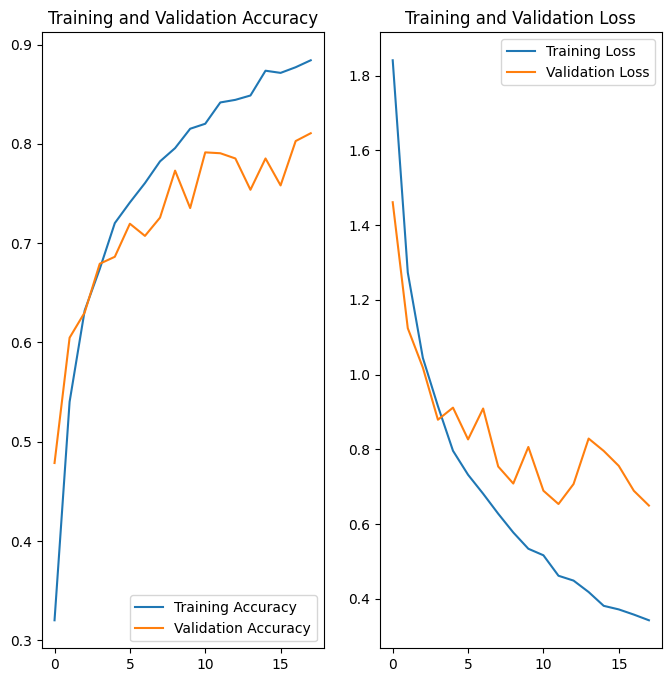

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Please upload a picture of a bug to test!


Saving Spider.jpg to Spider (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


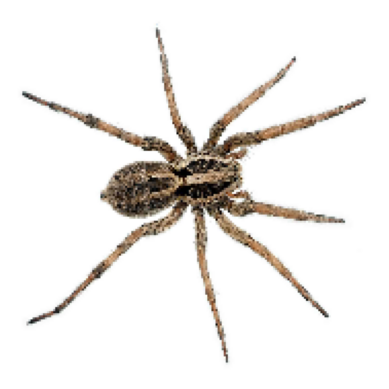

I am 99.97% confident this is a Spider.


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

print("Please upload a picture of a bug to test!")
uploaded = files.upload()

for fn in uploaded.keys():
  # 2. Load and resize the image to match your model (180x180)
  path = fn
  img = load_img(path, target_size=(180, 180))

  # 3. Convert to array and add a batch dimension
  img_array = img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  plt.imshow(img)
  plt.axis('off')
  plt.show()

  print(
      "I am {:.2f}% confident this is a {}."
      .format(100 * np.max(score), class_names[np.argmax(score)])
  )